## Table of Contents

1. [About LeetCode](#About-LeetCode)
2. [Disclaimer](#Disclaimer)
3. [Problem Description](#Problem-Description)
4. [Approach and Algorithm](#Approach-and-Algorithm)
5. [Code Implementation](#Code-Implementation)
6. [Big O Notation](#Big-O-Notation)

## 1. About LeetCode <a name="About-LeetCode"></a>


LeetCode is a popular online platform that provides a collection of coding interview questions and challenges. It is widely used by software engineers, developers, and students to practice and improve their algorithmic and coding skills.

LeetCode is a valuable resource for anyone looking to enhance their coding skills, prepare for coding interviews, or simply enjoy solving challenging problems. It can help you become more proficient in algorithms and data structures, improve problem-solving abilities, and gain confidence in coding interviews.

For more info about this platform, please check [the official website](https://leetcode.com/).




## 2. Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the problem stated in [LeetCode](https://leetcode.com/studyplan/leetcode-75/). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of LeetCode, and all rights are reserved by them.



## 3. Problem Description <a name="Problem-Description"></a>
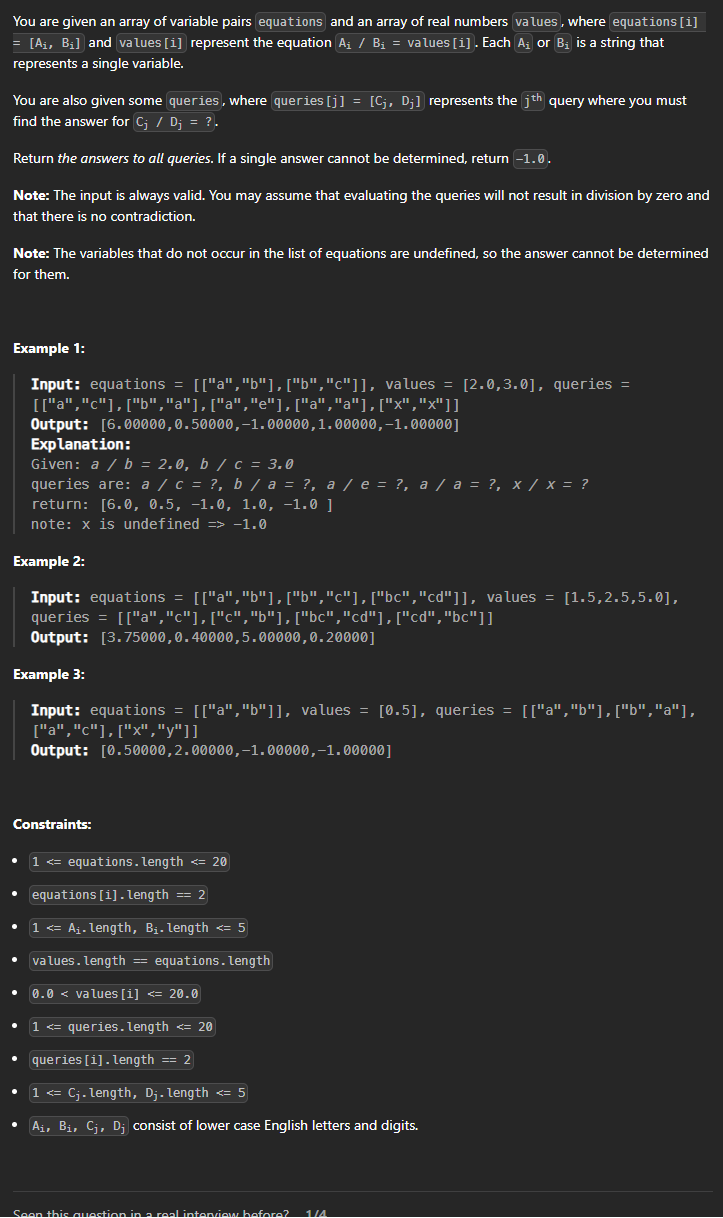

## 4. Approach and Algorithm <a name="Approach-and-Algorithm"></a>


Here's a step-by-step breakdown of the approach:

1. **Build the Graph:**
   - For each equation `A / B = value`, add two directed edges: `A -> B` with weight `value` and `B -> A` with weight `1 / value`. This step represents the conversion factor between variables.
   - Store this information in a graph, where each node has a dictionary of its neighbors and their corresponding weights.

2. **DFS Function:**
   - Implement a recursive DFS function that takes the start and end variables and a set of visited nodes.
   - If either the start or end variable is not in the graph, return -1.0 (undefined).
   - If the start and end variables are the same, return 1.0 (as any variable divided by itself is 1.0).
   - Mark the start variable as visited.
   - For each neighbor of the start variable, if the neighbor has not been visited, recursively call the DFS function with the neighbor as the new start variable.
   - Multiply the result of the recursive call by the weight of the current edge. If the result is not -1.0, return the multiplied result.

3. **Perform DFS for Each Query:**
   - Iterate through each query and call the DFS function with the query variables.
   - Store the result in a list.

4. **Return Results:**
   - Return the list of results for all queries.

The overall approach is to use DFS to traverse the graph and calculate the result for each query based on the given equations and values. If a variable is undefined or a path between variables does not exist, the result for that query is -1.0.



## 5. Code Implementation <a name="Code-Implementation"></a>


In [54]:
from collections import defaultdict
class Solution(object):
    def calcEquation(self, equations, values, queries):
        graph = defaultdict(dict)

        # Build the graph
        for (numerator, denominator), value in zip(equations, values):
            graph[numerator][denominator] = value
            graph[denominator][numerator] = 1.0 / value

        # DFS function to calculate the result for a query
        def dfs(start, end, visited):
            if start not in graph or end not in graph:
                return -1.0  # One or both variables are undefined

            if start == end:
                return 1.0

            visited.add(start)

            for neighbor, value in graph[start].items():
                if neighbor not in visited:
                    result = dfs(neighbor, end, visited)
                    if result != -1.0:
                        return value * result

            return -1.0

        # Perform DFS for each query
        results = []
        for query in queries:
            start, end = query
            result = dfs(start, end, set())
            results.append(result)

        return results

In [55]:
# Example 1
equations = [["a","b"],["b","c"]]
values = [2.0,3.0]
queries = [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]]
result = Solution().calcEquation(equations,values,queries)
print(result)

[6.0, 0.5, -1.0, 1.0, -1.0]


In [57]:
# Example 2
equations = [["a","b"],["b","c"],["bc","cd"]]
values = [1.5,2.5,5.0]
queries = ["a","c"],["c","b"],["bc","cd"],["cd","bc"]
result = Solution().calcEquation(equations,values,queries)
print(result)

[3.75, 0.4, 5.0, 0.2]


In [58]:
# Example 3
equations = [["a","b"]]
values = [0.5]
queries = [["a","b"],["b","a"],["a","c"],["x","y"]]
result = Solution().calcEquation(equations,values,queries)
print(result)

[0.5, 2.0, -1.0, -1.0]


## 6. Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

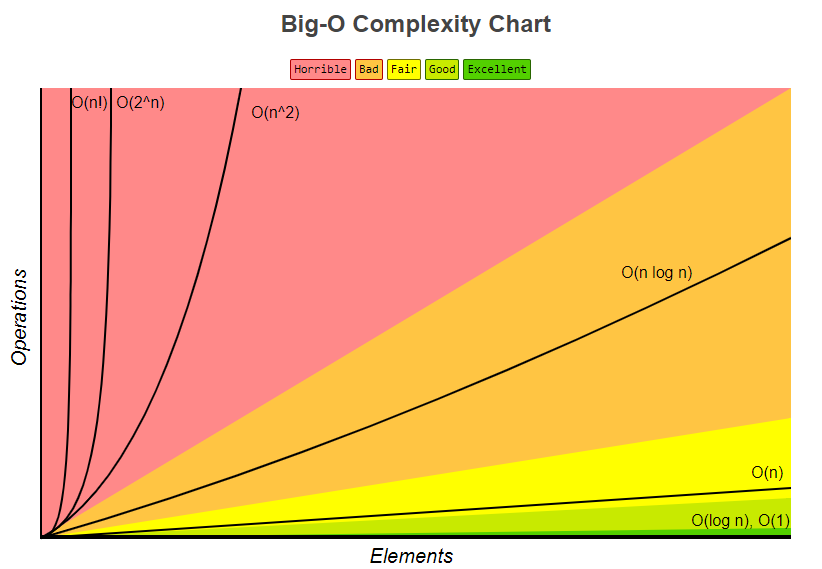


**Time Complexity:**

1. **Building the Graph:**
   - The loop to iterate over equations and values has a time complexity of $O(E)$, where $E$ is the number of equations.

2. **DFS Function:**
   - In the worst case, the DFS function may visit each node in the graph once, resulting in a time complexity of $O(V)$, where $V$ is the number of variables.

3. **Perform DFS for Each Query:**
   - For each query, the DFS function is called, and its time complexity is $O(V)$. Therefore, for $Q$ queries, the overall time complexity is $O(Q * V)$.

The dominant factor is usually the DFS traversal, so the overall time complexity is $O(Q * V)$.

**Space Complexity:**

1. **Graph Representation:**
   - The graph is represented using a defaultdict with nested dictionaries, storing the neighbors and their corresponding weights. The space complexity for this representation is $O(E + V)$, where $E$ is the number of equations and $V$ is the number of variables.

2. **DFS Recursive Call Stack:**
   - The maximum depth of the call stack during DFS is bounded by the height of the graph, which is $O(V)$. Therefore, the space complexity for the call stack is $O(V)$.

3. **Other Variables:**
   - The space complexity for other variables used in the function is $O(1)$.

The overall space complexity is $O(E + V)$.

In summary, the time complexity is $O(Q * V)$, and the space complexity is $O(E + V)$.